abtract: từ model LG đã train bây giờ ta xem features nào không quan trọng sẽ bỏ đi.


In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import load

In [2]:
modelLG=load('../../results/output_files/LGmodel_db01.pkl')

In [3]:
features_importancesLG=modelLG.coef_
features_importancesLG

array([[ 0.70691938,  0.58663972,  1.38650499,  0.07347602, -0.00384325,
         0.17777082,  0.23732291, -0.05081067, -0.02836244, -0.05904861,
        -0.7377315 ,  0.03767296,  0.03377037,  0.56050718, -0.00409431,
        -0.00738934,  0.09898784,  0.26289763,  0.15273628, -0.03396514,
        -0.0606705 ]])

In [4]:
#load data 01
db=pd.read_csv("../../data/processed/database01_drop_duplicates.csv")

In [5]:
#lấy tên các cột
features_name=db.drop('Diabetes',axis=1).columns
features_name

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
print(features_name.shape)
features_importancesLG.shape

(21,)


(1, 21)

In [7]:
##chuyển features_importancesLG thành 1 chiều
features_importancesLG = features_importancesLG.flatten() 
print(features_importancesLG.shape) 

(21,)


In [8]:
features_importance_LG=pd.DataFrame({
    'Feature': features_name,
    'Importance':features_importancesLG
}).sort_values(by="Importance",ascending=False)

features_importance_LG

,Feature,Importance
2,CholCheck,1.386505
0,HighBP,0.706919
1,HighChol,0.586640
13,GenHlth,0.560507
17,Sex,0.262898
6,HeartDiseaseorAttack,0.237323
5,Stroke,0.177771
18,Age,0.152736
16,DiffWalk,0.098988
3,BMI,0.073476


Ta thấy HvyAlcoholConsump,Income,Veggies,PhysActivity,Education,Fruits,MentHlth,Smoker là những thuộc tính ta sẽ bỏ

In [ ]:
features_to_remove=[
    'HvyAlcoholConsump', 'Income', 'Veggies', 
    'PhysActivity', 'Education', 'Fruits','MentHlth','Smoker'
]
db_afterRemove=db.drop(features_to_remove,axis=1)

In [10]:
db_afterRemove.head()

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Diabetes
0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0,4.0,0.0
1,1.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,12.0,0.0
2,0.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,10.0,0.0,1.0,13.0,0.0
3,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,1.0,11.0,0.0
4,0.0,0.0,1.0,29.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0


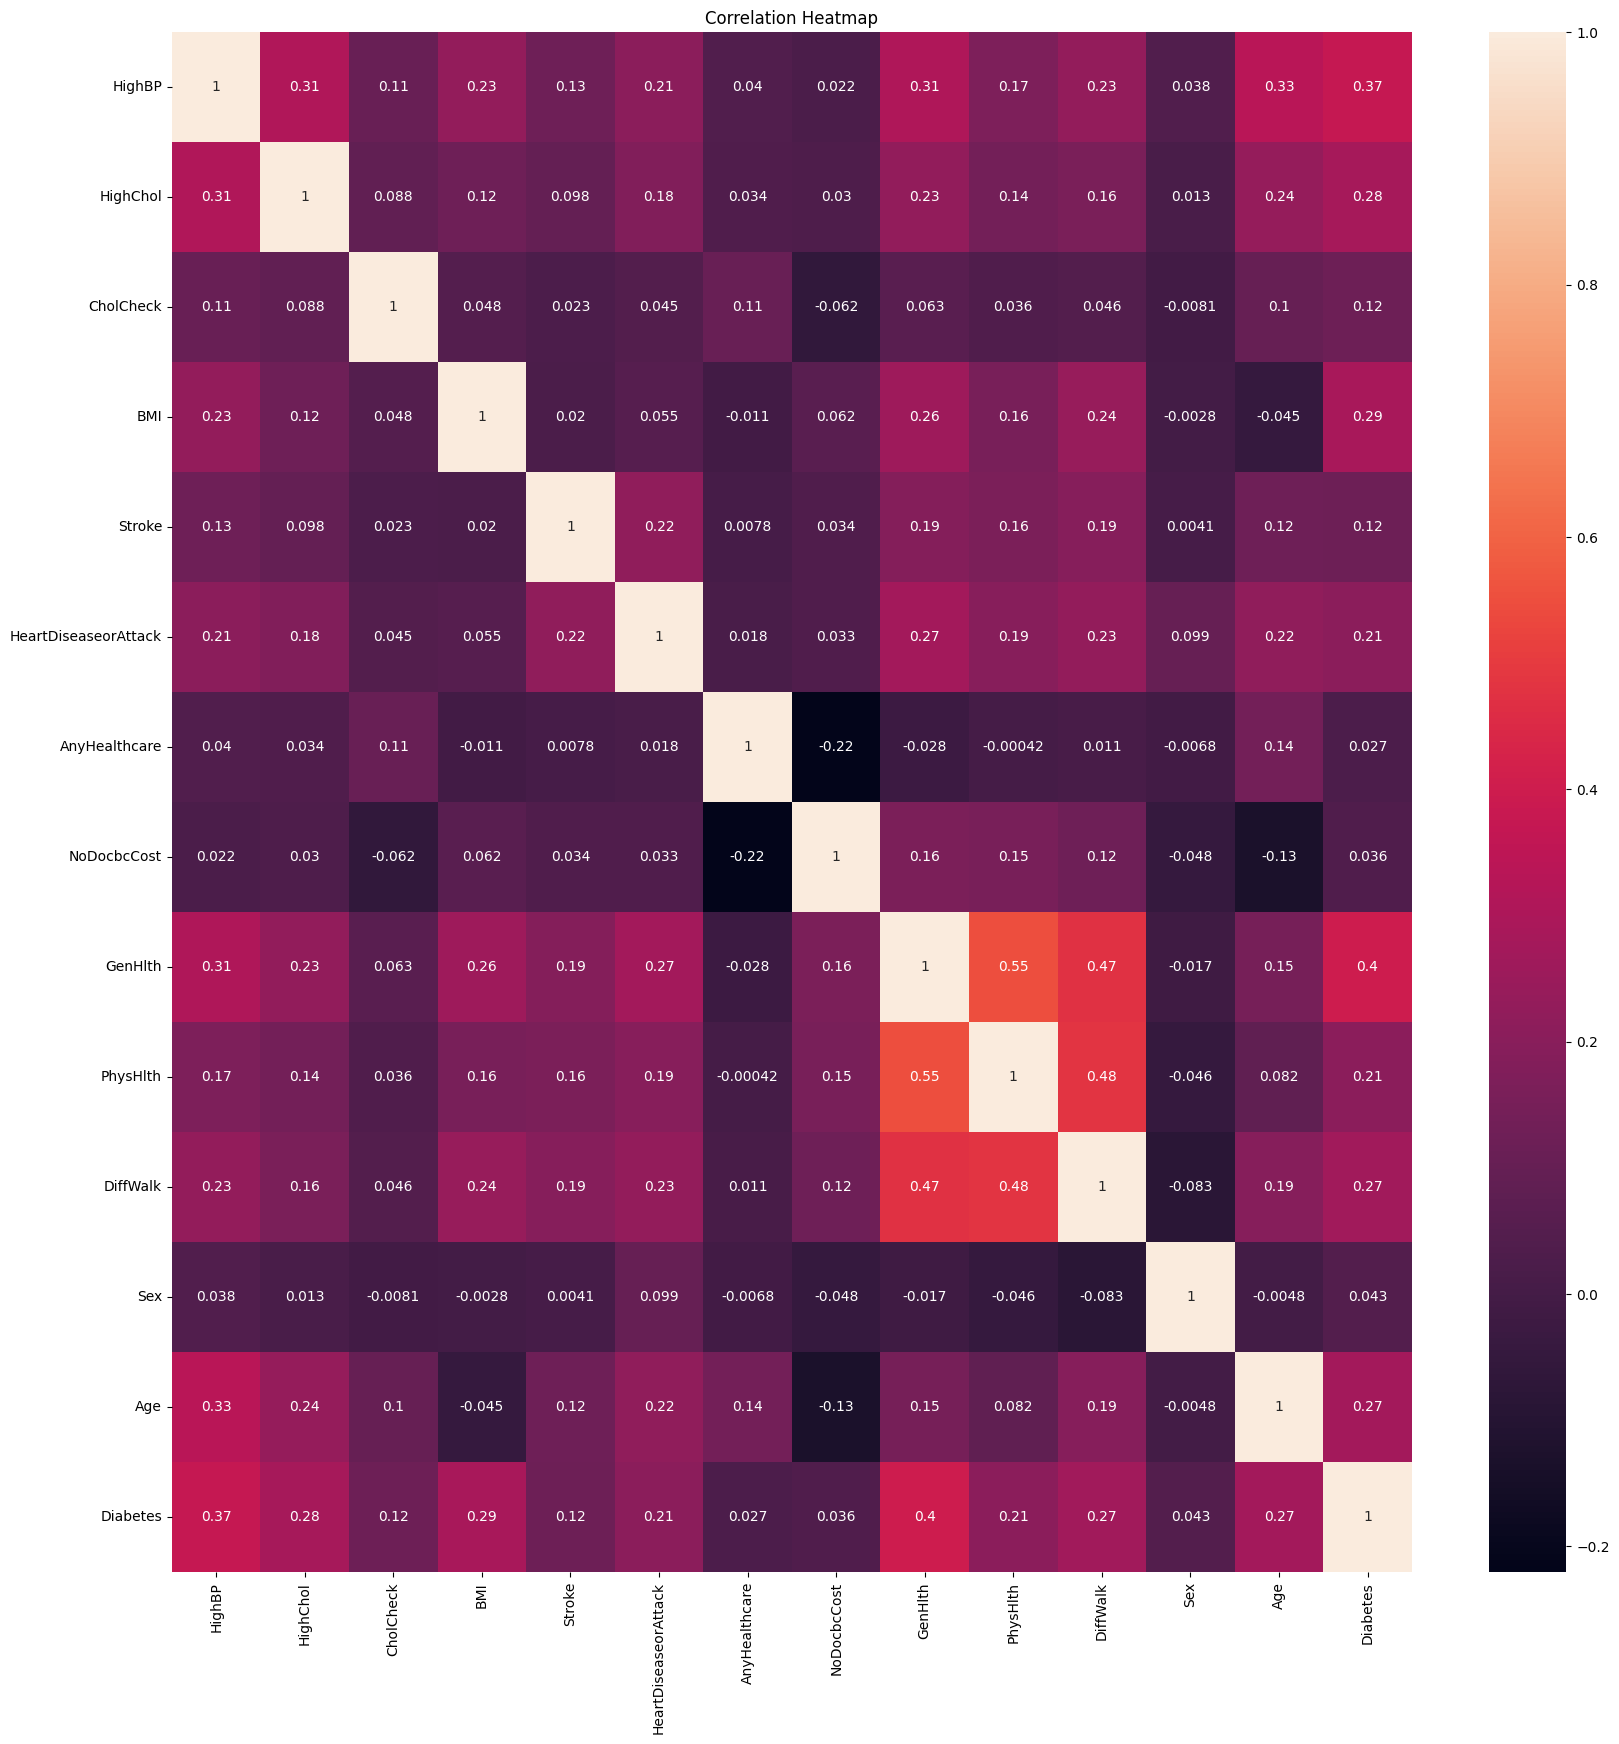

In [11]:
#plot corr mức độ tương tác lẫn nhau
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(db_afterRemove.corr(),annot=True).set_title('Correlation Heatmap')
plt.savefig('../../data/img/Corr_of_DB03',dpi=300, bbox_inches='tight')
plt.show()

In [12]:
#sau khi coi Correlation ta thấy rằng  PhysHlth có mức độ tương quan khá cao với nhiều feature như Genth(0,55), diffwalk(0,48)
#nên ta sẽ bỏ PhysHlth
db_afterRemove=db_afterRemove.drop(columns=['PhysHlth'])
db_afterRemove.head()

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Diabetes
0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,4.0,0.0
1,1.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,12.0,0.0
2,0.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,13.0,0.0
3,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,11.0,0.0
4,0.0,0.0,1.0,29.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,8.0,0.0


In [13]:
#save data lại
db_afterRemove.to_csv("../../data/processed/DB03.csv",index=False)